## **OpinionMiner_Sentiment-Classifier**

### Dataset:
https://github.com/moossahussain/OpinionMiner_Sentiment-Classifier/raw/refs/heads/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Load the dataset

In [ ]:
!wget https://github.com/moossahussain/OpinionMiner_Sentiment-Classifier/raw/refs/heads/main/financial_news_headlines_sentiment.csv

In [28]:
df = pd.read_csv('financial_news_headlines_sentiment.csv', header=None, names=["sentiment", "headline"], encoding='latin1')

## Explore the dataset

In [29]:
print(df.head())
print(df['sentiment'].value_counts())
print(df.isnull().sum())

  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
sentiment    0
headline     0
dtype: int64


## Clean the data

In [30]:
# Remove punctuation, convert to lowercase
df['headline'] = df['headline'].str.replace('[^\w\s]', '', regex=True).str.lower()

# Encode labels
sentiment_mapping = {'neutral': 0, 'negative': 1, 'positive': 2}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


## SMOTE (Imbalanced dataset)

In [ ]:
X = df['headline']
y = df['sentiment']

# Vectorize text using BoW
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(X).toarray()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_bow, y)

## BoW model

In [32]:
print("BoW example:", bow_vectorizer.get_feature_names_out()[:10])


BoW example: ['000' '03' '08' '10' '100' '11' '12' '12month' '13' '14']


## Tf-idf model

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['headline']).toarray()
y = df['sentiment']

smote = SMOTE(random_state=42)
X_tfidf_resampled, y_tfidf_resampled = smote.fit_resample(X_tfidf, y)

# Verify the sizes after SMOTE
print("After SMOTE, X_tfidf_resampled shape:", X_tfidf_resampled.shape)
print("After SMOTE, y_tfidf_resampled shape:", y_tfidf_resampled.shape)

After SMOTE, X_tfidf_resampled shape: (8637, 1000)
After SMOTE, y_tfidf_resampled shape: (8637,)


## Split train test data

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf_resampled, y_tfidf_resampled, test_size=0.2, random_state=42
)

# Verify the sizes after splitting
print("Train set shapes: X =", X_train_tfidf.shape, ", y =", y_train_tfidf.shape)
print("Test set shapes: X =", X_test_tfidf.shape, ", y =", y_test_tfidf.shape)

Train set shapes: X = (6909, 1000) , y = (6909,)
Test set shapes: X = (1728, 1000) , y = (1728,)


## RF Classification Algorithm

In [45]:
rf_classifier_tfidf = RandomForestClassifier(random_state=42)
rf_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_rf_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)

print("\nRandom Forest Classification Report (Tf-Idf):")
print(classification_report(y_test_tfidf, y_pred_rf_tfidf))


Random Forest Classification Report (Tf-Idf):
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       580
           1       0.97      0.95      0.96       564
           2       0.92      0.80      0.85       584

    accuracy                           0.89      1728
   macro avg       0.89      0.89      0.89      1728
weighted avg       0.89      0.89      0.89      1728



## LR Classification Algorithm

In [ ]:
lr_classifier_tfidf = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_lr_tfidf = lr_classifier_tfidf.predict(X_test_tfidf)

print("\nLogistic Regression Classification Report (Tf-Idf):")
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))


Logistic Regression Classification Report (Tf-Idf):
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       580
           1       0.90      0.92      0.91       564
           2       0.82      0.79      0.80       584

    accuracy                           0.83      1728
   macro avg       0.83      0.83      0.83      1728
weighted avg       0.83      0.83      0.83      1728



## Confusion Matrixes for two classification algorithms and two feature extractor methods

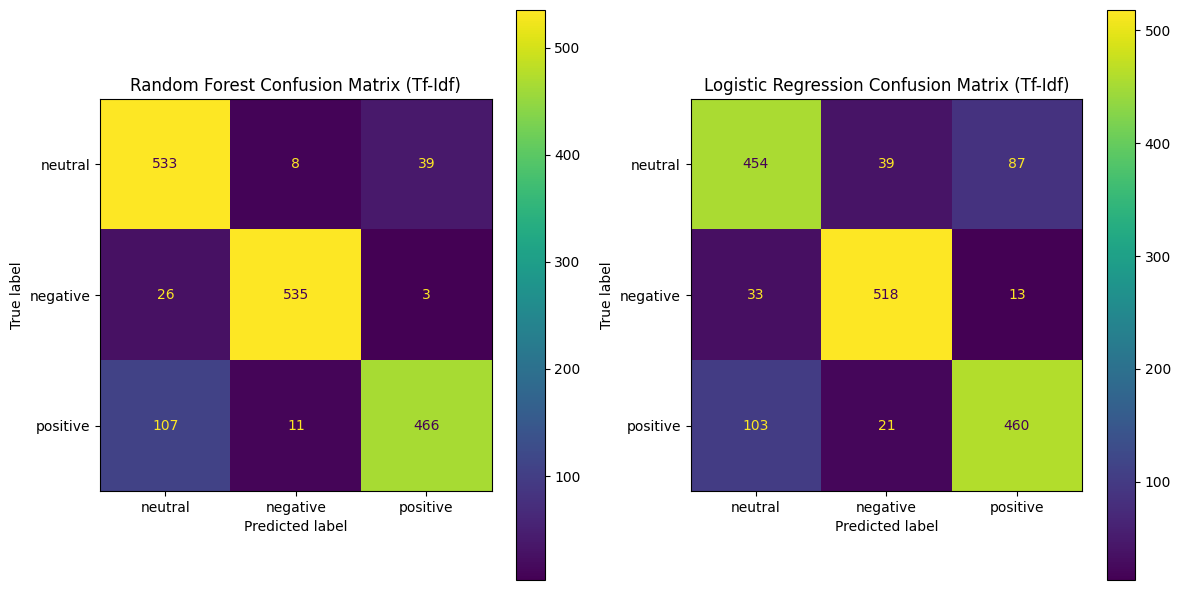

In [ ]:
# Random Forest Confusion Matrix (Tf-Idf)
cm_rf_tfidf = confusion_matrix(y_test_tfidf, y_pred_rf_tfidf)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(cm_rf_tfidf, display_labels=sentiment_mapping.keys()).plot(ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix (Tf-Idf)")

# Logistic Regression Confusion Matrix (Tf-Idf)
cm_lr_tfidf = confusion_matrix(y_test_tfidf, y_pred_lr_tfidf)
ConfusionMatrixDisplay(cm_lr_tfidf, display_labels=sentiment_mapping.keys()).plot(ax=ax[1])
ax[1].set_title("Logistic Regression Confusion Matrix (Tf-Idf)")

plt.tight_layout()
plt.show()